In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
employer_data = pd.read_csv("diligence_initech.fake_initech_employer_data.csv",  parse_dates=['month'])
worker_data = pd.read_csv('diligence_initech.fake_initech_worker_data.csv',  parse_dates=['month'])

In [59]:
worker_data['CohortMonth'] = worker_data.groupby('worker_id')['month'].transform('min')

In [60]:
cohort_data = worker_data.groupby(['CohortMonth', 'month']).agg(
    total_revenue=pd.NamedAgg(column='revenue', aggfunc='sum'),
    total_customers=pd.NamedAgg(column='worker_id', aggfunc='nunique'),
).reset_index()

cohort_data['MonthIndex'] = (cohort_data['month'] - cohort_data['CohortMonth']).dt.days // 30
cohort_data['LTV'] = cohort_data.groupby('CohortMonth')['total_revenue'].cumsum() / cohort_data.groupby('CohortMonth')['total_customers'].transform('first')
cohort_data['RevenueRetention'] = cohort_data['total_revenue'] / cohort_data.groupby('CohortMonth')['total_revenue'].transform('first')
cohort_data['CustomerRetention'] = cohort_data['total_customers'] / cohort_data.groupby('CohortMonth')['total_customers'].transform('first')



In [61]:
data1 = cohort_data[:650]
data2 = cohort_data[650:1150]
data3 = cohort_data[1150:]

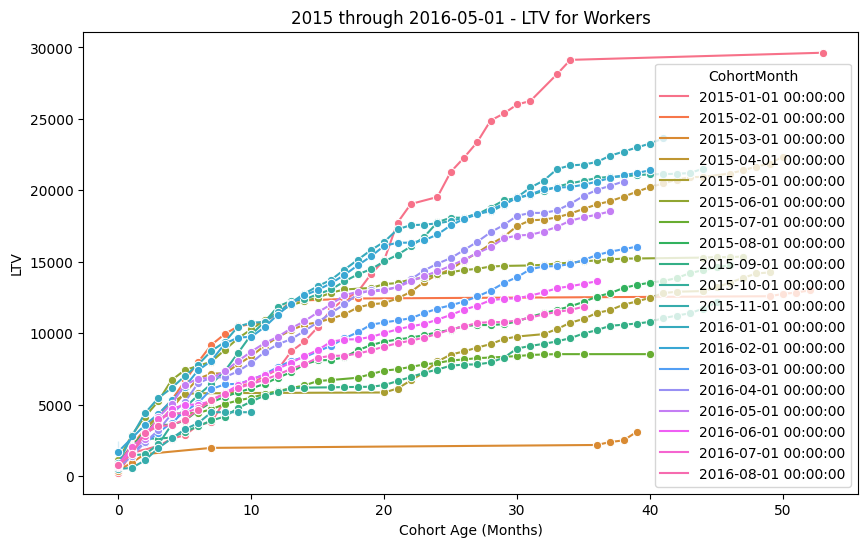

In [63]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='MonthIndex', y='LTV', hue='CohortMonth', data=data1, marker='o', dashes=True)
plt.title('2015 through 2016-05-01 - LTV for Workers')
plt.ylabel('LTV')
plt.xlabel('Cohort Age (Months)')
plt.show()

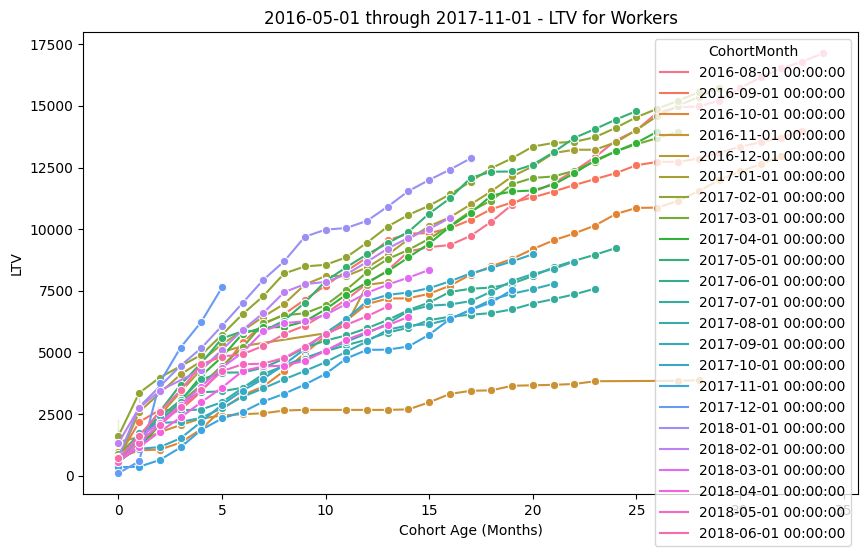

In [64]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='MonthIndex', y='LTV', hue='CohortMonth', data=data2, marker='o', dashes=True)
plt.title('2016-05-01 through 2017-11-01 - LTV for Workers')
plt.ylabel('LTV')
plt.xlabel('Cohort Age (Months)')
plt.show()

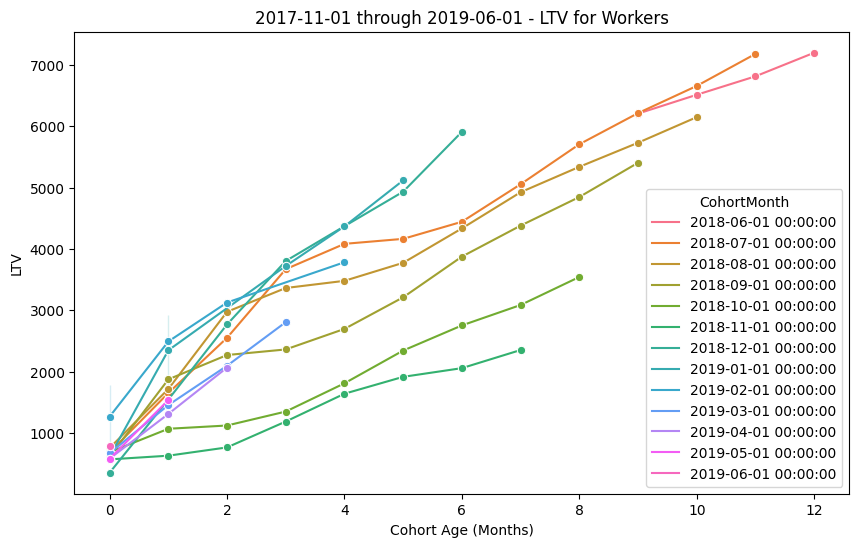

In [65]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='MonthIndex', y='LTV', hue='CohortMonth', data=data3, marker='o', dashes=True)
plt.title('2017-11-01 through 2019-06-01 - LTV for Workers')
plt.ylabel('LTV')
plt.xlabel('Cohort Age (Months)')
plt.show()

## Logo Retention

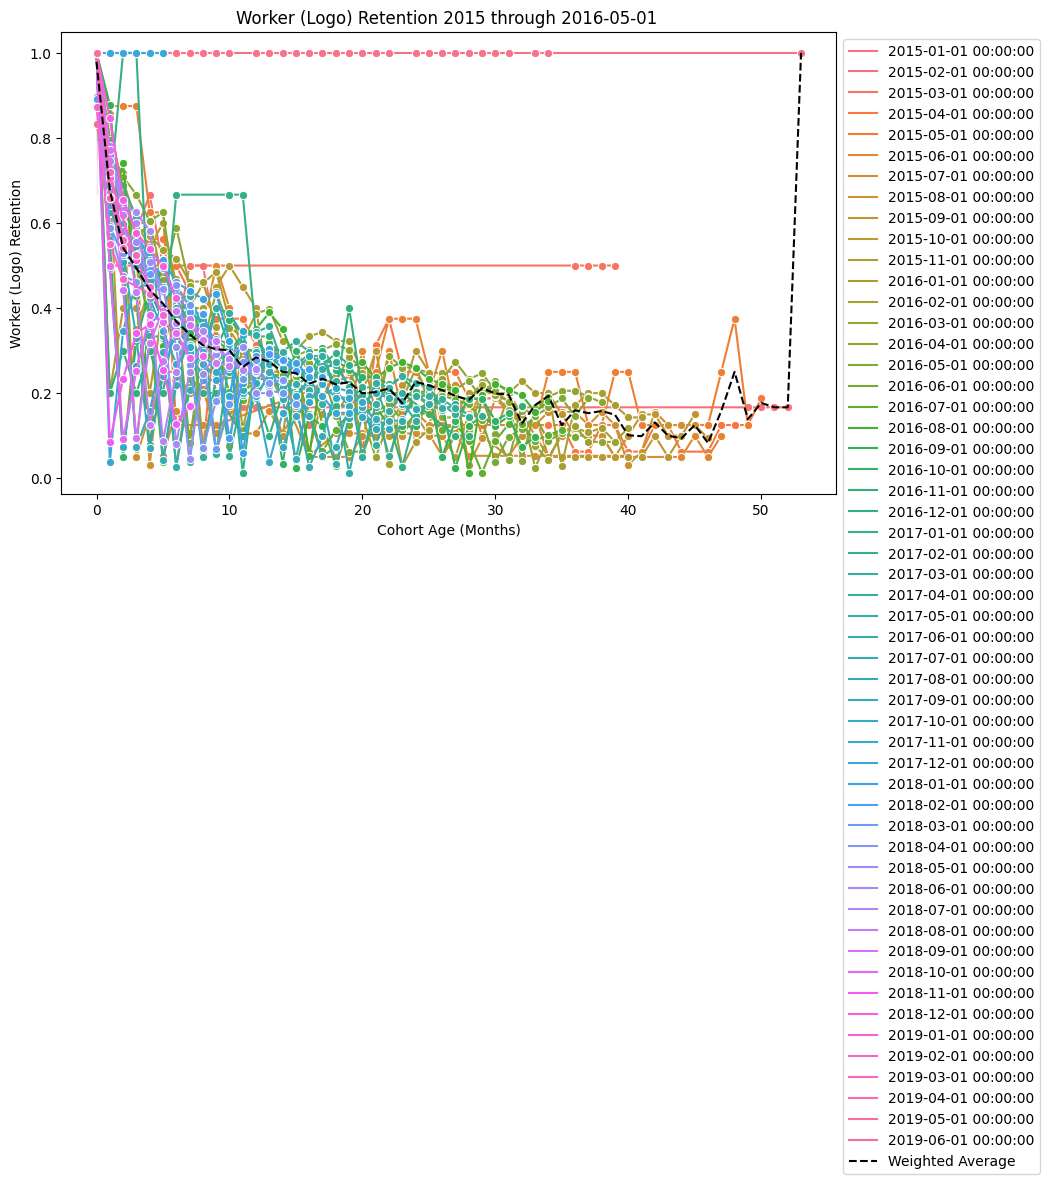

In [66]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='MonthIndex', y='CustomerRetention', hue='CohortMonth', data=cohort_data, marker='o', dashes=True)

# Adding weighted average line
average_customer_retention = cohort_data.groupby('MonthIndex')['CustomerRetention'].mean()
plt.plot(average_customer_retention.index, average_customer_retention.values, label='Weighted Average', color='black', linestyle='--')

plt.title('Worker (Logo) Retention 2015 through 2016-05-01 ')
plt.ylabel('Worker (Logo) Retention')
plt.xlabel('Cohort Age (Months)')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

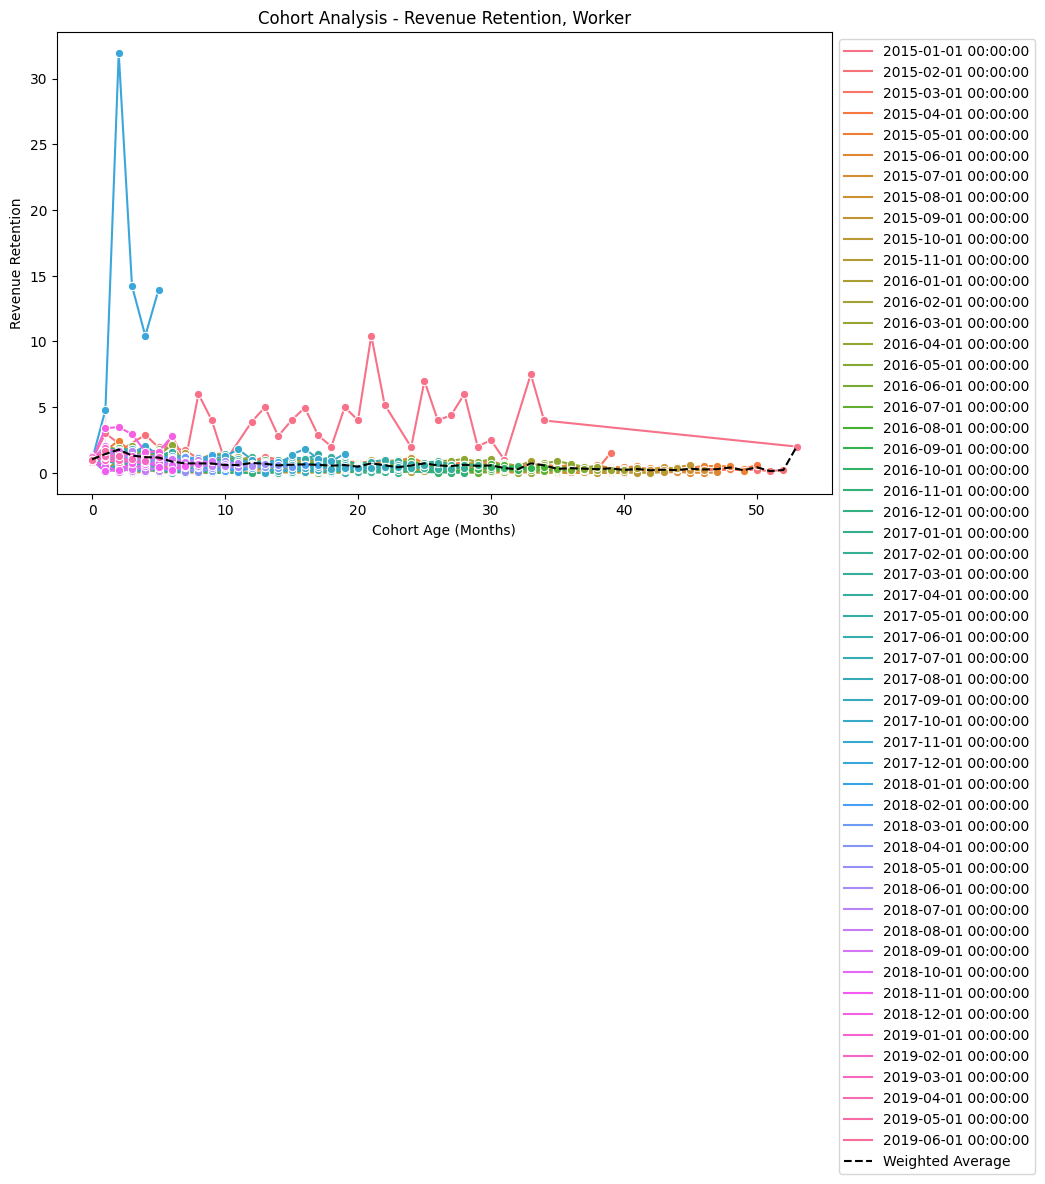

In [67]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='MonthIndex', y='RevenueRetention', hue='CohortMonth', data=cohort_data, marker='o', dashes=True)

# Adding weighted average line
average_revenue_retention = cohort_data.groupby('MonthIndex')['RevenueRetention'].mean()
plt.plot(average_revenue_retention.index, average_revenue_retention.values, label='Weighted Average', color='black', linestyle='--')

plt.title('Cohort Analysis - Revenue Retention, Worker')
plt.ylabel('Revenue Retention')
plt.xlabel('Cohort Age (Months)')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()